In [1]:
!ls

CONTRIBUTING.md README.md       awesome.gif     working.ipynb
LICENSE.md      Untitled.ipynb  student.ipynb   zippedData


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import requests

In [9]:
#LOADING DATA INTO PANDAS DF FROM 'zippedData/'
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv')
imdb_name_basics = pd.read_csv('zippedData/imdb.name.basics.csv')
title_alias = pd.read_csv('zippedData/imdb.title.akas.csv')
title_basics = pd.read_csv('zippedData/imdb.title.basics.csv') #Contains Genre info and Title
title_crew = pd.read_csv('zippedData/imdb.title.crew.csv') #Contains Director ID and Writer ID
title_principals = pd.read_csv('zippedData/imdb.title.principals.csv')
title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv')
movie_info = pd.read_csv('zippedData/rt.movie_info.tsv', sep='\t')
reviews = pd.read_csv('zippedData/rt.reviews.tsv', sep='\t', encoding= 'unicode_escape')
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv')
movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv')
print('nessisary files loaded into pandas successfully')

nessisary files loaded into pandas successfully


In [25]:
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_int,worldwide_gross_int,p_and_l
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425000000,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410600000,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350000000,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",330600000,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",317000000,1316721747,999721747
...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,7000,0,-7000
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",6000,240495,234495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",5000,1338,-3662
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,1400,0,-1400


In [11]:
movie_budgets['production_budget_int'] = movie_budgets.apply(lambda x: x['production_budget'].strip('$').replace(',',''), axis=1).astype('int')
movie_budgets['worldwide_gross_int'] = movie_budgets.apply(lambda x: x['worldwide_gross'].strip('$').replace(',',''), axis=1).astype('int')
movie_budgets['p_and_l'] = movie_budgets['worldwide_gross_int'] - movie_budgets['production_budget_int']
movie_budgets.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_int,worldwide_gross_int,p_and_l
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425000000,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410600000,1045663875,635063875


In [12]:
movie_budgets.describe()

,id,production_budget_int,worldwide_gross_int,p_and_l
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,9.148746e+07,5.989970e+07
std,28.821076,4.181208e+07,1.747200e+08,1.460889e+08
min,1.000000,1.100000e+03,0.000000e+00,-2.002376e+08
25%,25.000000,5.000000e+06,4.125415e+06,-2.189071e+06
50%,50.000000,1.700000e+07,2.798445e+07,8.550286e+06
75%,75.000000,4.000000e+07,9.764584e+07,6.096850e+07
max,100.000000,4.250000e+08,2.776345e+09,2.351345e+09


<AxesSubplot:xlabel='production_budget_int', ylabel='p_and_l'>

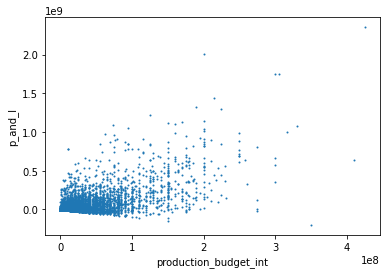

In [45]:
# movie_budgets.boxplot(by='p_and_l')
movie_budgets.plot.scatter(x='production_budget_int', y='p_and_l', s=1)

In [14]:
title_ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [25]:
movie_info.head(2)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


In [15]:
movie_info.groupby('director').count()

,id,synopsis,rating,genre,writer,theater_date,dvd_date,currency,box_office,runtime,studio
director,,,,,,,,,,,
Abel Ferrara,2,2,2,2,2,2,2,0,0,2,0
Adam Ravetch|Sarah Robertson,1,1,1,1,1,1,1,1,1,1,1
Adam Shankman,1,1,1,1,1,1,1,1,1,1,1
Adam Silver|Ben Hayflick,1,1,1,1,1,1,1,0,0,1,0
Aditya Chopra,1,1,1,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
Youssef Delara,1,1,1,1,1,1,1,1,1,1,0
Yves Simoneau,1,1,1,1,1,1,1,0,0,1,0
Zak Penn,1,1,1,1,1,1,1,0,0,1,1


In [41]:
# title_alias #['title_id', 'ordering', 'title', 'region', 'language', 'types', 'attributes', 'is_original_title']
# title_basics #['tconst', 'primary_title', 'original_title', 'start_year', 'runtime_minutes', 'genres']
# title_crew #['tconst', 'directors', 'writers']
# title_principals #['tconst', 'ordering', 'nconst', 'category', 'job', 'characters']
# title_ratings #['tconst', 'averagerating', 'numvotes']
# imdb_name_basics #['nconst', 'primary_name', 'birth_year', 'death_year', 'primary_profession', 'known_for_titles']

# new = pd.concat([title_basics, title_ratings], axis=1)

new = title_basics.set_index('tconst').join(title_ratings.set_index('tconst'))

title_ratings[title_ratings['tconst'] == 'tt0069204']

,tconst,averagerating,numvotes
2223,tt0069204,6.1,13


In [42]:
# new

In [44]:
movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN
